# Assignment 1

## Data Preprocessing

### Importing libraries

In [51]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import neural_network
from xgboost import XGBClassifier

%matplotlib inline
%qtconsole

<b>Sampling rate and K-fold CV</b>

In [4]:
rate, folds = 0.1, 6

<b>Dict helpers</b>

In [5]:
test_accuracy_comparisons = dict()
valid_accuracy_comparisons = dict()
tuned_params_list = dict()

### Initialising dataset

In [6]:
dataset = pd.read_csv('data/fashion-mnist_train.csv')
dataset = dataset.sample(frac=rate) 
num_classes = 10
classes = {
    0 : "T-shirt/top", 
    1 : "Trouser", 
    2 : "Pullover", 
    3 : "Dress", 
    4 : "Coat", 
    5 : "Sandal", 
    6 : "Shirt", 
    7 : "Sneaker", 
    8 :"Bag", 
    9 :"Ankle boot"}
display(dataset.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
8948,4,0,0,0,0,0,0,0,0,0,...,0,0,0,179,183,0,0,0,0,0
59022,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59921,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5782,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34662,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset["label"].value_counts() #distribution of different labels

7    628
6    625
9    624
4    621
2    603
1    601
3    596
0    575
8    567
5    560
Name: label, dtype: int64

In [9]:
#if(dataset.select_dtypes(include=[np.number]).shape[1] > 0):
#    display(dataset.select_dtypes(include=[np.number]).describe())
#if(dataset.select_dtypes(include=[np.object]).shape[1] > 0):
#    display(dataset.select_dtypes(include=[np.object]).describe())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.50450,0.001000,0.013833,0.032167,0.099667,0.250167,0.414667,0.872000,2.398167,5.963333,...,33.955667,23.047500,16.543167,17.603833,22.381000,18.075667,8.865000,3.159667,1.002667,0.083500
std,2.86758,0.044714,0.519955,0.733409,2.129669,3.928972,5.337958,8.453295,15.092965,24.463989,...,57.243589,48.588058,42.089287,43.806735,51.007563,45.106874,30.326848,18.522878,10.406699,2.084127
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.00000,3.000000,36.000000,52.000000,121.000000,133.000000,170.000000,195.000000,200.000000,242.000000,...,255.000000,255.000000,243.000000,246.000000,255.000000,245.000000,255.000000,233.000000,202.000000,97.000000


In [6]:
#Visualise fields
#data_viz(dataset)

In [7]:
# Visualise fields in relation to target
#data_viz_target(dataset, "label")

### Divide labels into target and input classes

In [8]:
X = dataset[dataset.columns[1:]]
Y = np.array(dataset["label"]) # np needed for confusion_matrix()
Y

array([4, 8, 4, ..., 5, 9, 7], dtype=int64)

### Normalise X

In [9]:
X = X/255

### Split dataset into train, test and split

In [10]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

## Algorithms

### Decision Tree

<b>Training</b>

In [16]:
dtree = tree.DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Visualise decision tree</b>

In [13]:
#feature_names = list(X_train.columns)
#visualize_tree(my_tree, feature_names, fileName='dt_over.png')
#Image(filename='dt_over.png') 

<b> Calculations on training set </b>

In [17]:
# Make a set of predictions for the training data
y_pred = dtree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       290
           2       1.00      1.00      1.00       311
           3       1.00      1.00      1.00       285
           4       1.00      1.00      1.00       313
           5       1.00      1.00      1.00       279
           6       1.00      1.00      1.00       304
           7       1.00      1.00      1.00       310
           8       1.00      1.00      1.00       294
           9       1.00      1.00      1.00       324

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[290   0   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0   0 311   0   0   0   0   0   0   0]
 [  0   0   0 285   0   0   0   0   0   0]
 [  0   0   0   0 313   0   0   0   0   0]
 [  0   0   

<b>Calculations on validation set</b>

In [18]:
# Make a set of predictions for the validation data
y_pred = dtree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["Standard Decision Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_valid, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       109
           1       0.90      0.90      0.90       124
           2       0.65      0.65      0.65       121
           3       0.68      0.72      0.70       104
           4       0.56      0.54      0.55       123
           5       0.86      0.84      0.85       113
           6       0.47      0.47      0.47       135
           7       0.82      0.84      0.83       129
           8       0.80      0.89      0.84       114
           9       0.93      0.85      0.89       128

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200

[[ 65   3   3   8   2   0  23   0   5   0]
 [  0 112   3   9   0   0   0   0   0   0]
 [  7   2  79   2  13   0  16   0   2   0]
 [  7   4   1  75   8   0   7   0   2   0]
 [  1   0  18   9  66   0  24   0   5   0]
 [  0   0  

<b> Calculations on test set </b>

In [28]:
# Make a set of predictions for the test data
y_pred = dtree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Standard Decision Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print nicer confusion matrix
#print("Confusion Matrix")
#pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7394444444444445
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       165
           1       0.92      0.93      0.92       176
           2       0.62      0.62      0.62       175
           3       0.73      0.75      0.74       185
           4       0.59      0.56      0.57       169
           5       0.81      0.88      0.84       170
           6       0.50      0.52      0.51       201
           7       0.86      0.79      0.83       198
           8       0.85      0.87      0.86       193
           9       0.84      0.88      0.86       168

    accuracy                           0.74      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.74      0.74      0.74      1800

[[101   2   3  11   3   0  41   1   2   1]
 [  1 163   0  10   1   0   1   0   0   0]
 [  6   0 109   3  24   0  26   0   7   0]
 [ 12   8   2 139  14   1   9   0   0   0]
 [  1   0  35  12  94   0  19   0   8   

### Prune decision tree

Set max_depth to 2 to restrict the size of tree

In [30]:
prune_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 2)
prune_tree = prune_tree.fit(X_train,y_train)

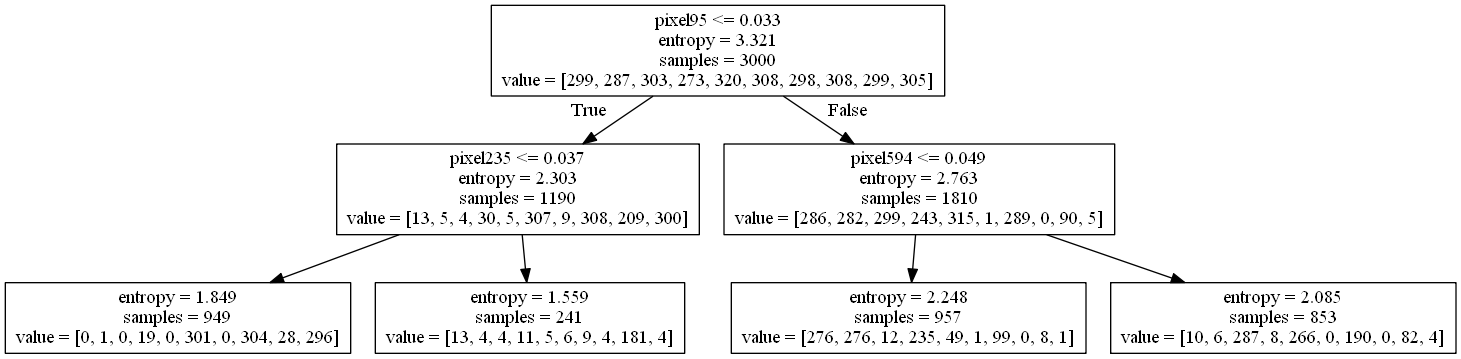

In [32]:
#visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(prune_tree, feature_names, fileName="dt_under.png")
Image(filename='dt_under.png') 

<b> Calculations on training set </b>

In [35]:
# Make a set of predictions for the training data
y_pred = prune_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

print(metrics.confusion_matrix(y_train, y_pred))

# Print confusion matrix
#print("Confusion Matrix")
#pd.crosstab(np.array(y_train), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.34933333333333333
              precision    recall  f1-score   support

           0       0.29      0.92      0.44       299
           1       0.00      0.00      0.00       287
           2       0.34      0.95      0.50       303
           3       0.00      0.00      0.00       273
           4       0.00      0.00      0.00       320
           5       0.00      0.00      0.00       308
           6       0.00      0.00      0.00       298
           7       0.32      0.99      0.48       308
           8       0.75      0.61      0.67       299
           9       0.00      0.00      0.00       305

    accuracy                           0.35      3000
   macro avg       0.17      0.35      0.21      3000
weighted avg       0.17      0.35      0.21      3000

[[276   0  10   0   0   0   0   0  13   0]
 [276   0   6   0   0   0   0   1   4   0]
 [ 12   0 287   0   0   0   0   0   4   0]
 [235   0   8   0   0   0   0  19  11   0]
 [ 49   0 266   0   0   0   0   0   5  

C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> Calculations on validation set </b>

In [39]:
# Make a set of predictions for the test data
y_pred = prune_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["Better Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

print(metrics.confusion_matrix(y_valid, y_pred))

# Print confusion matrix
#print("Confusion Matrix")
#pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True, dropna = False)

Accuracy: 0.35083333333333333
              precision    recall  f1-score   support

           0       0.27      0.89      0.41       116
           1       0.00      0.00      0.00       127
           2       0.36      0.95      0.52       128
           3       0.00      0.00      0.00       122
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00       122
           6       0.00      0.00      0.00       120
           7       0.34      0.99      0.50       129
           8       0.73      0.61      0.67       111
           9       0.00      0.00      0.00       112

    accuracy                           0.35      1200
   macro avg       0.17      0.34      0.21      1200
weighted avg       0.17      0.35      0.21      1200

[[103   0   8   0   0   0   0   0   5   0]
 [123   0   2   0   0   0   0   1   1   0]
 [  5   0 122   0   0   0   0   0   1   0]
 [101   0   5   0   0   0   0  10   6   0]
 [ 19   0  91   0   0   0   0   0   3  

C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> Calculations on test set</b>

In [43]:
# Make a set of predictions for the test data
y_pred = prune_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Better Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Print confusion matrix
#print("Confusion Matrix")
#pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True, dropna = False)

Accuracy: 0.34444444444444444
              precision    recall  f1-score   support

           0       0.25      0.90      0.39       165
           1       0.00      0.00      0.00       176
           2       0.33      0.93      0.48       175
           3       0.00      0.00      0.00       185
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       201
           7       0.35      0.99      0.52       198
           8       0.76      0.59      0.66       193
           9       0.00      0.00      0.00       168

    accuracy                           0.34      1800
   macro avg       0.17      0.34      0.21      1800
weighted avg       0.17      0.34      0.21      1800

[[149   0   8   0   0   0   0   0   8   0]
 [169   0   6   0   0   0   0   1   0   0]
 [ 11   0 162   0   0   0   0   0   2   0]
 [161   0   6   0   0   0   0  10   8   0]
 [ 28   0 135   0   0   0   0   0   6  

C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Parameter tuning

<b>1. Cross validation</b>

In [48]:
my_tree = tree.DecisionTreeClassifier(max_depth = 2)
scores = cross_val_score(my_tree, X_train_plus_valid, y_train_plus_valid, cv=10)
print(scores)

[0.37142857 0.36428571 0.36190476 0.3547619  0.35952381 0.38333333
 0.35238095 0.36904762 0.36428571 0.34761905]


<b>2. Grid search</b>

In [50]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [100, 200, 300, 400]}

# Perform the search
tuned_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=folds, verbose = 2, \
                            return_train_score = True, n_jobs = -1)
tuned_tree.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(tuned_tree.best_params_)
tuned_params_list["Tuned Tree"] = tuned_tree.best_params_
display(tuned_tree.best_score_)
display(tuned_tree.cv_results_)

Fitting 6 folds for each of 152 candidates, totalling 912 fits
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=200, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=200, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............

[CV]  criterion=gini, max_depth=9, min_samples_split=200, total=   0.8s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=300 ..............
[CV]  criterion=gini, max_depth=9, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=9, min_samples_split=400 ..............

[CV]  criterion=gini, max_depth=15, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=15, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=15, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=15, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=18, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=100, total=   1.2s
[CV] criterion=gini, max_depth=18, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=100, total=   1.2s
[CV] criterion=gini, max_depth=18, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=100, total=   1.2s
[CV] criterion=gini, max_depth=18, min_samples_split=100 ......

[CV]  criterion=gini, max_depth=24, min_samples_split=100, total=   1.3s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   0.8s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   0.8s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   1.0s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   0.8s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   0.9s
[CV] criterion=gini, max_depth=24, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=24, min_samples_split=200, total=   0.9s
[CV] criterion=gini, max_depth=24, min_samples_split=300 ......

[CV]  criterion=gini, max_depth=30, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=30, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=30, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=30, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=30, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=30, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=30, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=30, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=30, min_samples_split=400 ......

[CV]  criterion=gini, max_depth=36, min_samples_split=400, total=   0.4s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.2s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.3s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.2s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.1s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.1s
[CV] criterion=gini, max_depth=39, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=39, min_samples_split=100, total=   1.3s
[CV] criterion=gini, max_depth=39, min_samples_split=200 ......

[CV]  criterion=gini, max_depth=45, min_samples_split=200, total=   1.0s
[CV] criterion=gini, max_depth=45, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=200, total=   0.8s
[CV] criterion=gini, max_depth=45, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=200, total=   0.9s
[CV] criterion=gini, max_depth=45, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=200, total=   0.9s
[CV] criterion=gini, max_depth=45, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=45, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=300, total=   0.7s
[CV] criterion=gini, max_depth=45, min_samples_split=300 .............
[CV]  criterion=gini, max_depth=45, min_samples_split=300, total=   0.7s
[CV] criterion=gini, max_depth=45, min_samples_split=300 ......

[CV]  criterion=gini, max_depth=51, min_samples_split=300, total=   0.6s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.4s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=51, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=51, min_samples_split=400, total=   0.5s
[CV] criterion=gini, max_depth=54, min_samples_split=100 ......

[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=200 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=200, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=200 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=200, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=200 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=200, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_

[CV]  criterion=entropy, max_depth=9, min_samples_split=200, total=   1.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.1s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=9, min_samples_

[CV]  criterion=entropy, max_depth=15, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=15, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=15, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=15, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=15, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=100, total=   1.4s
[CV] criterion=entropy, max_depth=18, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=100, total=   1.6s
[CV] criterion=entropy, max_depth=18, min_

[CV]  criterion=entropy, max_depth=24, min_samples_split=100, total=   1.5s
[CV] criterion=entropy, max_depth=24, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=100, total=   1.4s
[CV] criterion=entropy, max_depth=24, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=100, total=   1.5s
[CV] criterion=entropy, max_depth=24, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=24, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=24, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=24, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=24, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=24, min_

[CV]  criterion=entropy, max_depth=30, min_samples_split=200, total=   1.1s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   1.1s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   0.9s
[CV] criterion=entropy, max_depth=30, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=30, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=30, min_

[CV]  criterion=entropy, max_depth=36, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=36, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=36, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=36, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=36, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=36, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=36, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=36, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=36, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=39, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=39, min_samples_split=100, total=   1.4s
[CV] criterion=entropy, max_depth=39, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=39, min_samples_split=100, total=   1.5s
[CV] criterion=entropy, max_depth=39, min_

[CV]  criterion=entropy, max_depth=45, min_samples_split=100, total=   1.8s
[CV] criterion=entropy, max_depth=45, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=100, total=   1.6s
[CV] criterion=entropy, max_depth=45, min_samples_split=100 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=100, total=   1.8s
[CV] criterion=entropy, max_depth=45, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=45, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=200, total=   1.4s
[CV] criterion=entropy, max_depth=45, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=45, min_samples_split=200 ..........
[CV]  criterion=entropy, max_depth=45, min_samples_split=200, total=   1.2s
[CV] criterion=entropy, max_depth=45, min_

[CV]  criterion=entropy, max_depth=51, min_samples_split=200, total=   1.3s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   1.1s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   1.2s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   0.9s
[CV] criterion=entropy, max_depth=51, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=51, min_samples_split=300, total=   1.0s
[CV] criterion=entropy, max_depth=51, min_

[CV]  criterion=entropy, max_depth=57, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=57, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=57, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=57, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=57, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=57, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=57, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=57, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=57, min_samples_split=400, total=   0.8s


[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed: 14.2min finished


Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 100}

0.7278571428571428

{'mean_fit_time': array([0.30618886, 0.30691663, 0.31053086, 0.30381552, 0.61750901,
        0.58215785, 0.5510002 , 0.45292171, 0.85777247, 0.74135689,
        0.59871455, 0.45435321, 1.00437363, 0.80594468, 0.60203167,
        0.45036451, 1.1077855 , 0.84768101, 0.60522568, 0.47887226,
        1.15901709, 0.8658632 , 0.61203686, 0.4525462 , 1.18890293,
        0.87056645, 0.60635579, 0.45223566, 1.19243093, 0.87140226,
        0.60460754, 0.45216064, 1.21925886, 0.87038306, 0.60365645,
        0.45147864, 1.20011036, 0.86134473, 0.60151347, 0.46064627,
        1.19582721, 0.85642354, 0.6074272 , 0.45884498, 1.21651848,
        0.85587752, 0.60439873, 0.44872892, 1.20022698, 0.8980087 ,
        0.64353585, 0.53634063, 1.3368516 , 1.04992994, 0.81540906,
        0.58581742, 1.53104897, 0.89843726, 0.63945218, 0.45262976,
        1.19895697, 0.8630325 , 0.62382042, 0.4719733 , 1.53173765,
        0.91378371, 0.61683993, 0.47971598, 1.27708371, 0.9043866 ,
        0.64211595, 0.49684302,

<b> Evaluate performance of tuned tree </b>

In [52]:
# Make a set of predictions for the test data
y_pred = tuned_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7088888888888889
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       165
           1       0.86      0.94      0.90       176
           2       0.65      0.59      0.62       175
           3       0.67      0.64      0.65       185
           4       0.51      0.75      0.60       169
           5       0.72      0.87      0.79       170
           6       0.51      0.41      0.45       201
           7       0.83      0.73      0.78       198
           8       0.84      0.80      0.82       193
           9       0.89      0.82      0.85       168

    accuracy                           0.71      1800
   macro avg       0.71      0.71      0.71      1800
weighted avg       0.71      0.71      0.71      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,95,1,3,15,7,0,39,0,5,0,165
1,1,166,1,5,0,0,3,0,0,0,176
2,8,5,104,1,42,0,9,0,6,0,175
3,8,17,2,118,24,2,14,0,0,0,185
4,1,0,15,7,127,0,14,0,5,0,169
5,0,0,0,4,0,148,0,12,4,2,170
6,26,4,28,7,46,0,82,0,8,0,201
7,0,0,0,0,0,37,0,145,1,15,198
8,2,0,6,19,4,6,1,1,154,0,193


<b>Visualise tuned tree</b>

In [54]:
#{'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 100}

best_tree = tree.DecisionTreeClassifier(min_samples_split=100, criterion='entropy', max_depth=24)
best_tree = best_tree.fit(X_train, y_train)

# visualise the decision tree
#feature_names = list(X_train.columns)
#visualize_tree(best_tree, feature_names, 'dt_tuned.png')
#Image(filename='dt_tuned.png') 

## Comparing Models

### Random Forests

In [11]:
##Random Forest##
forest = ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200, n_jobs = -1)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
# Make a set of predictions for the test data
y_pred = forest.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       109
           1       1.00      0.94      0.97       124
           2       0.61      0.72      0.66       121
           3       0.67      0.86      0.75       104
           4       0.57      0.67      0.61       123
           5       0.98      0.76      0.86       113
           6       0.82      0.21      0.33       135
           7       0.85      0.89      0.87       129
           8       0.86      0.94      0.90       114
           9       0.82      0.95      0.88       128

    accuracy                           0.77      1200
   macro avg       0.78      0.77      0.75      1200
weighted avg       0.78      0.77      0.75      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,86,0,3,16,2,0,1,0,1,0,109
1,1,117,4,1,1,0,0,0,0,0,124
2,1,0,87,0,28,0,2,0,3,0,121
3,6,0,3,89,5,0,0,0,1,0,104
4,0,0,22,14,82,0,3,0,2,0,123
5,0,0,0,0,0,86,0,13,0,14,113
6,37,0,22,10,27,0,28,0,11,0,135
7,0,0,0,0,0,1,0,115,0,13,129
8,0,0,2,3,0,1,0,1,107,0,114


<b> Grid Search </b>

In [15]:
rf_grid = [{'max_features': list(range(2, 30, 2)), 'n_estimators': list(range(50, 310, 50)), 'min_samples_split': [100]}]
tuned_forest = GridSearchCV(ensemble.RandomForestClassifier(), rf_grid, cv=folds, verbose = 2, n_jobs=-1)
tuned_forest.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(tuned_forest.best_params_)
tuned_params_list["Tuned Random Forest"] = tuned_forest.best_params_
print(tuned_forest.best_score_)

Fitting 6 folds for each of 84 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  5.7min finished


Best parameters set found on development set:
{'max_features': 16, 'min_samples_split': 100, 'n_estimators': 300}
0.805


In [19]:
# Make a set of predictions for the test data
y_pred = tuned_forest.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       176
           1       1.00      0.90      0.95       187
           2       0.67      0.77      0.72       171
           3       0.76      0.82      0.79       207
           4       0.68      0.81      0.74       185
           5       0.92      0.91      0.91       168
           6       0.75      0.44      0.55       186
           7       0.94      0.85      0.89       189
           8       0.89      0.95      0.92       159
           9       0.87      0.97      0.92       172

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.81      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,138,0,7,19,1,0,5,0,6,0,176
1,0,168,7,11,0,0,1,0,0,0,187
2,0,0,132,1,27,0,8,0,3,0,171
3,3,0,4,170,21,0,5,0,4,0,207
4,0,0,15,12,149,0,8,0,1,0,185
5,1,0,0,0,0,153,0,8,0,6,168
6,43,0,28,10,20,1,81,0,3,0,186
7,0,0,0,0,0,8,0,161,1,19,189
8,0,0,4,0,2,2,0,0,151,0,159


### Bagging

In [20]:
# Do the same job with random forests
bag_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
bag_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=No

In [21]:
# Make a set of predictions for the validation data
y_pred = bag_model.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["Bagging"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       109
           1       0.95      0.85      0.90       124
           2       0.70      0.71      0.70       121
           3       0.62      0.76      0.68       104
           4       0.62      0.70      0.66       123
           5       0.76      0.81      0.78       113
           6       0.66      0.34      0.45       135
           7       0.84      0.84      0.84       129
           8       0.77      0.92      0.84       114
           9       0.90      0.92      0.91       128

    accuracy                           0.76      1200
   macro avg       0.75      0.76      0.75      1200
weighted avg       0.76      0.76      0.75      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,81,4,3,14,0,0,2,0,5,0,109
1,0,106,4,12,1,1,0,0,0,0,124
2,1,0,86,1,24,1,2,0,6,0,121
3,2,0,3,79,6,10,2,0,2,0,104
4,0,1,7,8,86,0,17,0,4,0,123
5,0,0,0,2,1,91,0,13,2,4,113
6,29,1,16,11,19,2,46,0,11,0,135
7,0,0,0,0,0,10,0,108,2,9,129
8,0,0,3,0,1,3,1,1,105,0,114


<b> Grid Search </b>

In [22]:
# Set up the parameter grid to seaerch
bag_grid = [{'n_estimators': list(range(50, 310, 50)), 'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy", max_depth = 50, min_samples_leaf = 200)]}]

# Perform the search
bag_tuned = GridSearchCV(ensemble.BaggingClassifier(), bag_grid, cv=folds, verbose = 2, n_jobs = -1)
bag_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(bag_tuned.best_params_)
tuned_params_list["Tuned Bagging"] = bag_tuned.best_params_
print(bag_tuned.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 11.5min finished


Best parameters set found on development set:
{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'n_estimators': 150}
0.6461904761904762


In [23]:
# Make a set of predictions for the test data
y_pred = bag_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned Bagging"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.6783333333333333
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       176
           1       0.96      0.84      0.89       187
           2       0.52      0.76      0.62       171
           3       0.62      0.70      0.66       207
           4       0.52      0.69      0.59       185
           5       0.71      0.49      0.58       168
           6       0.75      0.02      0.03       186
           7       0.78      0.80      0.79       189
           8       0.73      0.86      0.79       159
           9       0.71      0.94      0.81       172

    accuracy                           0.68      1800
   macro avg       0.70      0.68      0.65      1800
weighted avg       0.70      0.68      0.65      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,127,3,13,22,0,0,0,0,11,0,176
1,1,157,6,19,0,1,0,0,3,0,187
2,2,0,130,1,32,0,1,0,5,0,171
3,6,1,23,144,5,20,0,0,7,1,207
4,1,0,28,23,128,0,0,0,5,0,185
5,1,1,0,2,0,83,0,39,7,35,168
6,41,1,39,18,75,1,3,0,8,0,186
7,0,0,0,0,0,6,0,152,2,29,189
8,1,1,10,2,7,1,0,0,136,1,159


### AdaBoost

In [32]:
## Ada Boost ##
adaboost = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 200), \
                                       n_estimators=10)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=200,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [33]:
# Make a set of predictions for the validation data
y_pred = adaboost.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["AdaBoost"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.5916666666666667
              precision    recall  f1-score   support

           0       0.47      0.55      0.50       109
           1       0.98      0.52      0.68       124
           2       0.52      0.41      0.46       121
           3       0.50      0.74      0.60       104
           4       0.55      0.54      0.55       123
           5       0.57      0.75      0.65       113
           6       0.25      0.27      0.26       135
           7       0.74      0.56      0.64       129
           8       0.76      0.92      0.83       114
           9       0.89      0.72      0.80       128

    accuracy                           0.59      1200
   macro avg       0.62      0.60      0.60      1200
weighted avg       0.63      0.59      0.59      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,60,0,3,11,0,0,33,0,2,0,109
1,3,65,1,49,0,0,6,0,0,0,124
2,16,0,50,4,22,0,26,0,3,0,121
3,12,1,0,77,1,0,13,0,0,0,104
4,1,0,13,7,67,0,30,0,5,0,123
5,0,0,0,2,0,85,0,14,7,5,113
6,35,0,25,4,31,0,37,0,3,0,135
7,0,0,0,0,0,40,0,72,11,6,129
8,2,0,4,0,1,1,1,0,105,0,114


<b> Grid Search </b>

In [34]:
# Set up the parameter grid to seaerch
ada_grid = [ {'n_estimators': list(range(10, 200, 10))}]
              #, 'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_leaf = 200)]}


# Perform the search
ada_tuned = GridSearchCV(ensemble.AdaBoostClassifier(), ada_grid, cv=folds, verbose = 2)
ada_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(ada_tuned.best_params_)
tuned_params_list["Tuned AdaBoost"] = ada_tuned.best_params_
print(ada_tuned.best_score_)

Fitting 6 folds for each of 19 candidates, totalling 114 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   2.2s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   2.2s
[CV] n_estimators=20 .................................................
[CV] .

[CV] ................................. n_estimators=100, total=  11.0s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  12.1s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  12.1s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  12.1s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  12.2s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  12.4s
[CV] n_estimators=110 ................................................
[CV] ................................. n_estimators=110, total=  11.9s
[CV] n_estimators=120 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed: 21.5min finished


Best parameters set found on development set:
{'n_estimators': 10}
0.3680952380952381


In [36]:
# Make a set of predictions for the test data
y_pred = ada_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned AdaBoost"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.4711111111111111
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.96      0.77      0.85       187
           2       0.38      0.06      0.11       171
           3       0.40      0.89      0.55       207
           4       0.29      0.66      0.41       185
           5       0.37      0.56      0.45       168
           6       0.00      0.00      0.00       186
           7       0.58      0.67      0.62       189
           8       0.54      0.53      0.54       159
           9       0.69      0.48      0.57       172

    accuracy                           0.47      1800
   macro avg       0.42      0.46      0.41      1800
weighted avg       0.42      0.47      0.41      1800

Confusion Matrix


C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,1,2,3,4,5,7,8,9,All
True,,,,,,,,,
0,0,0,134,23,4,0,13,2,176
1,144,1,36,4,1,0,1,0,187
2,0,11,6,133,1,0,20,0,171
3,1,0,184,15,5,0,2,0,207
4,4,10,45,122,0,0,4,0,185
5,1,0,0,0,94,42,6,25,168
6,0,6,48,112,1,0,19,0,186
7,0,0,0,0,56,126,0,7,189
8,0,1,9,8,20,34,85,2,159


### Logistic Regression

In [39]:
# Do the same job with logistic regression
regression_m = linear_model.LogisticRegression()
regression_m.fit(X_train,y_train)

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Make a set of predictions for the test data
y_pred = regression_m.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["Logistic Regression"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8033333333333333
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       109
           1       0.98      0.98      0.98       124
           2       0.71      0.68      0.69       121
           3       0.75      0.78      0.76       104
           4       0.73      0.67      0.70       123
           5       0.90      0.87      0.88       113
           6       0.55      0.53      0.54       135
           7       0.90      0.87      0.88       129
           8       0.90      0.92      0.91       114
           9       0.90      0.95      0.93       128

    accuracy                           0.80      1200
   macro avg       0.80      0.81      0.80      1200
weighted avg       0.80      0.80      0.80      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,87,1,0,5,1,0,13,0,2,0,109
1,0,122,0,2,0,0,0,0,0,0,124
2,3,0,82,3,17,0,15,0,1,0,121
3,4,2,1,81,3,0,10,1,2,0,104
4,2,0,11,6,83,1,19,0,1,0,123
5,0,0,0,2,0,98,0,7,0,6,113
6,23,0,18,6,10,0,72,0,6,0,135
7,0,0,1,0,0,9,0,112,0,7,129
8,2,0,2,2,0,1,2,0,105,0,114


<b> Grid Search </b>

In [42]:
# Set up the parameter grid to seaerch
regress_grid = [ {'multi_class': ['ovr'],  'C': [x / 10.0 for x in range(2, 21, 2)], 'solver':['liblinear'], 'max_iter':[100]}]

# Perform the search
regression_tuned = GridSearchCV(linear_model.LogisticRegression(), regress_grid, cv=folds, verbose = 2)
regression_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(regression_tuned.best_params_)
tuned_params_list["Tuned Logistic Regression"] = regression_tuned.best_params_
print(regression_tuned.best_score_)


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.5s
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.5s
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.6s
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.5s
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.4s
[CV] C=0.2, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.2, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.5s
[CV] C=0.4, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.4, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.9s
[CV] C=0.4, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=0.4, max_iter=100, multi_class=ovr, solver=liblinear, total=   2.8s
[CV] C=0.4, max_iter=100, multi_class=ovr,

[CV]  C=2.0, max_iter=100, multi_class=ovr, solver=liblinear, total=   4.3s
[CV] C=2.0, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=2.0, max_iter=100, multi_class=ovr, solver=liblinear, total=   4.1s
[CV] C=2.0, max_iter=100, multi_class=ovr, solver=liblinear ..........
[CV]  C=2.0, max_iter=100, multi_class=ovr, solver=liblinear, total=   4.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.6min finished


Best parameters set found on development set:
{'C': 0.4, 'max_iter': 100, 'multi_class': 'ovr', 'solver': 'liblinear'}
0.8276190476190476


In [43]:
# Make a set of predictions for the test data
y_pred = regression_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned Logistic Regression"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8327777777777777
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       176
           1       0.99      0.96      0.97       187
           2       0.68      0.76      0.72       171
           3       0.84      0.79      0.82       207
           4       0.73      0.77      0.75       185
           5       0.92      0.86      0.89       168
           6       0.65      0.56      0.61       186
           7       0.94      0.92      0.93       189
           8       0.90      0.94      0.92       159
           9       0.89      0.98      0.93       172

    accuracy                           0.83      1800
   macro avg       0.83      0.84      0.83      1800
weighted avg       0.83      0.83      0.83      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,143,0,5,12,0,1,10,0,5,0,176
1,0,179,3,3,0,0,1,1,0,0,187
2,1,0,130,2,16,0,20,0,2,0,171
3,7,2,5,163,17,0,10,0,3,0,207
4,1,0,19,7,143,0,12,0,3,0,185
5,1,0,0,1,0,144,0,8,0,14,168
6,29,0,26,5,18,0,105,0,3,0,186
7,0,0,0,0,0,8,0,174,0,7,189
8,0,0,3,0,2,1,3,1,149,0,159


### Nearest Neighbour

In [44]:
## kNN ##
nnm = neighbors.KNeighborsClassifier()
nnm = nnm.fit(X_train,y_train)

In [45]:
# Make a set of predictions for the test data
y_pred = nnm.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["kNN"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8041666666666667
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       109
           1       0.98      0.98      0.98       124
           2       0.66      0.78      0.71       121
           3       0.84      0.81      0.82       104
           4       0.69      0.72      0.70       123
           5       0.99      0.73      0.84       113
           6       0.59      0.49      0.54       135
           7       0.85      0.95      0.90       129
           8       0.98      0.89      0.94       114
           9       0.88      0.96      0.92       128

    accuracy                           0.80      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.80      0.80      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,82,1,1,4,2,0,19,0,0,0,109
1,1,121,1,1,0,0,0,0,0,0,124
2,4,0,94,0,17,0,6,0,0,0,121
3,7,1,0,84,7,0,3,0,2,0,104
4,1,0,16,5,88,0,13,0,0,0,123
5,0,0,1,2,0,83,2,16,0,9,113
6,31,0,23,3,12,0,66,0,0,0,135
7,0,0,0,0,0,0,0,122,0,7,129
8,1,0,5,1,1,1,2,1,102,0,114


<b> Grid Search </b>

In [47]:
# Set up the parameter grid to seaerch
param_grid = [{'n_neighbors': list(range(1, 50, 5))}]

# Perform the search
nnmt = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=folds, verbose = 2)
nnmt.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(nnmt.best_params_)
tuned_params_list["Tuned kNN"] = nnmt.best_params_
print(nnmt.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   3.7s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   3.8s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   3.8s
[CV] n_neighbors=6 ...................................................
[CV] .

[CV] ................................... n_neighbors=46, total=   3.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.9min finished


Best parameters set found on development set:
{'n_neighbors': 6}
0.7980952380952382


In [49]:
# Make a set of predictions for the test data
y_pred = nnmt.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["Tuned kNN"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8211111111111111
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       176
           1       0.97      0.96      0.97       187
           2       0.65      0.80      0.72       171
           3       0.91      0.78      0.84       207
           4       0.71      0.74      0.72       185
           5       0.98      0.78      0.87       168
           6       0.63      0.50      0.56       186
           7       0.87      0.95      0.91       189
           8       0.97      0.89      0.93       159
           9       0.88      0.96      0.92       172

    accuracy                           0.82      1800
   macro avg       0.83      0.82      0.82      1800
weighted avg       0.83      0.82      0.82      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,153,0,9,2,0,0,12,0,0,0,176
1,0,180,3,3,1,0,0,0,0,0,187
2,1,0,136,2,17,0,15,0,0,0,171
3,13,6,4,161,16,0,6,0,1,0,207
4,1,0,22,7,137,0,17,0,1,0,185
5,1,0,0,1,0,131,1,19,0,15,168
6,39,0,29,1,21,0,93,0,3,0,186
7,0,0,0,0,0,2,0,180,0,7,189
8,0,0,6,0,2,1,4,3,142,1,159


### XGBoost

In [58]:
# Do the same job with random forests
xgboost = XGBClassifier()
xgboost = xgboost.fit(X_train,y_train)

In [59]:
# Make a set of predictions for the test data
y_pred = xgboost.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
valid_accuracy_comparisons["XG"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       109
           1       1.00      0.98      0.99       124
           2       0.78      0.74      0.76       121
           3       0.81      0.85      0.83       104
           4       0.75      0.81      0.78       123
           5       0.93      0.92      0.92       113
           6       0.69      0.60      0.64       135
           7       0.92      0.90      0.91       129
           8       0.97      0.97      0.97       114
           9       0.94      0.97      0.95       128

    accuracy                           0.85      1200
   macro avg       0.85      0.86      0.86      1200
weighted avg       0.85      0.85      0.85      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,92,0,2,5,0,0,9,0,1,0,109
1,1,121,0,2,0,0,0,0,0,0,124
2,1,0,89,1,18,1,11,0,0,0,121
3,5,0,0,88,3,0,8,0,0,0,104
4,1,0,9,7,100,0,6,0,0,0,123
5,0,0,0,0,0,104,0,8,0,1,113
6,22,0,12,5,12,0,81,0,3,0,135
7,0,0,0,0,0,6,0,116,0,7,129
8,0,0,1,0,0,0,2,0,111,0,114


<b> Grid Search </b>

In [ ]:
#unable to perform for long folds or multi-hyper params..taking too long to run..
# Set up the parameter grid to seaerch
xg_grid = [{'eta': list(range(0, 1))}]

# Perform the search
xg_tuned = GridSearchCV(XGBClassifier(), xg_grid, cv_folds = 1, verbose = 2, n_jobs=-1)
xg_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(xg_tuned.best_params_)
tuned_params_list["Tuned XG"] = xg_tuned.best_params
print(xg_tuned.best_score_)

In [76]:
y_pred = xg_tuned.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
test_accuracy_comparisons["XG"] = 84 
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

<strong><i>From the above results we can infer that the best model having highest accuracy is Logistic Regression. </i></strong>

### Running best on test dataset

In [81]:
test_dataset = pd.read_csv('data/fashion-mnist_test.csv')
test_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test_X = test_dataset[test_dataset.columns[1:]]
test_Y = np.array(test_dataset["label"])

In [83]:
test_X = test_X/255

In [85]:
best_model = linear_model.LogisticRegression(C=0.4,max_iter = 1000,multi_class='ovr',solver='liblinear')
best_model = best_model.fit(X,Y)

In [86]:
# Make a set of predictions for the test data
y_pred = best_model.predict(test_X)

# Print performance details
accuracy = metrics.accuracy_score(test_Y, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(test_Y, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(test_Y), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.834
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.74      0.75      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.78      0.76      1000
           5       0.92      0.88      0.90      1000
           6       0.63      0.55      0.59      1000
           7       0.89      0.91      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,773,7,26,53,5,4,105,0,26,1,1000
1,3,960,6,21,1,2,7,0,0,0,1000
2,14,5,748,9,135,0,78,0,11,0,1000
3,32,21,20,869,40,0,17,0,1,0,1000
4,1,0,75,30,783,0,106,0,5,0,1000
5,2,1,3,1,0,880,1,66,13,33,1000
6,143,5,126,47,97,1,551,0,30,0,1000
7,0,0,0,0,0,41,0,911,1,47,1000
8,1,0,8,23,3,13,16,5,930,1,1000
